In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from datetime import datetime

In [2]:
url = "https://monexnews.com/kurs-valuta-asing.htm?kurs=JPY&searchdatefrom=01-01-2019&searchdateto=31-12-2019"
url_get = requests.get(url)
soup = BeautifulSoup(url_get.content, 'html.parser')

In [3]:
table = soup.find('table', attrs={'class' : 'table'})

In [4]:
tr = table.find_all('tr', attrs={'class':'verySoftGreyBg'})

In [5]:
temp =[]

for i in range (1, 247):
    row = table.find_all('tr')[i]
    #get Tanggal
    tanggal = row.find_all('td')[0].text
    tanggal = tanggal.strip()
    #get kurs_jual
    kurs_jual = row.find_all('td')[1].text
    kurs_jual = kurs_jual.strip()
    #get kurs_beli
    kurs_beli = row.find_all('td')[2].text
    kurs_beli = kurs_beli.strip()
    temp.append((tanggal, kurs_jual, kurs_beli))

temp = temp[::-1]


In [6]:
df = pd.DataFrame(temp, columns = ('Tanggal', 'Kurs Jual', 'Kurs Beli'))
df.head()

,Tanggal,Kurs Jual,Kurs Beli
0,02 Januari 2019,"132,89","131,54"
1,03 Januari 2019,"135,44","134,08"
2,04 Januari 2019,"133,51","132,17"
3,07 Januari 2019,"130,86","129,51"
4,08 Januari 2019,"129,84","128,52"


In [7]:
df['Kurs Beli'] = df['Kurs Beli'].str.replace(",", ".")
df['Kurs Jual'] = df['Kurs Jual'].str.replace(",", ".")
df[['Kurs Beli', 'Kurs Jual']] = df[['Kurs Beli', 'Kurs Jual']].astype('float64')
df.dtypes

Tanggal       object
Kurs Jual    float64
Kurs Beli    float64
dtype: object

In [8]:
df['Tanggal'] = df['Tanggal'].str.replace("Januari", "Jan")
df['Tanggal'] = df['Tanggal'].str.replace("Februari", "Feb")
df['Tanggal'] = df['Tanggal'].str.replace("Maret", "Mar")
df['Tanggal'] = df['Tanggal'].str.replace("April", "Apr")
df['Tanggal'] = df['Tanggal'].str.replace("Mei", "May")
df['Tanggal'] = df['Tanggal'].str.replace("Juni", "Jun")
df['Tanggal'] = df['Tanggal'].str.replace("Juli", "Jul")
df['Tanggal'] = df['Tanggal'].str.replace("Agustus", "Aug")
df['Tanggal'] = df['Tanggal'].str.replace("September", "Sep")
df['Tanggal'] = df['Tanggal'].str.replace("Oktober", "Oct")
df['Tanggal'] = df['Tanggal'].str.replace("November", "Nov")
df['Tanggal'] = df['Tanggal'].str.replace("Desember", "Dec")

In [9]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], dayfirst=True)

In [10]:
df.set_index('Tanggal', inplace=True)

In [13]:
tanggal2019 = pd.date_range(start='2019-01-01', end='2019-12-31')
tanggal2019

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
               '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
               '2019-12-30', '2019-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [15]:
df = df.reindex(tanggal2019)
df

,Kurs Jual,Kurs Beli
2019-01-01,NaN,NaN
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-05,NaN,NaN
...,...,...
2019-12-27,128.11,126.83
2019-12-28,NaN,NaN
2019-12-29,NaN,NaN
2019-12-30,128.30,127.02


In [21]:
df = df.fillna(method='ffill').fillna(method='bfill')
df

,Kurs Jual,Kurs Beli
2019-01-01,132.89,131.54
2019-01-02,132.89,131.54
2019-01-03,135.44,134.08
2019-01-04,133.51,132.17
2019-01-05,133.51,132.17
...,...,...
2019-12-27,128.11,126.83
2019-12-28,128.11,126.83
2019-12-29,128.11,126.83
2019-12-30,128.30,127.02


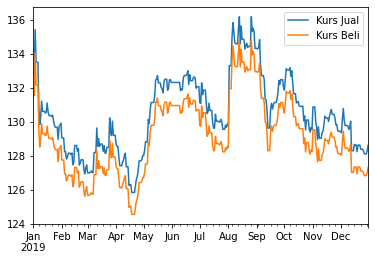

In [22]:
df.plot(kind='line')